# EDA on NASDAQ Dataset of AAPL
===================================================================================================
## Project - Stock Price Prediction Using NASDAQ Dataset

### Author: Subhajit Saha
### We have collected dataset from NASDAQ portal for five diffrent companies (Apple, Amazon, Microsoft, Tesla, JP Morgan) for last 6 months.

***Apple dataset url: https://www.nasdaq.com/market-activity/stocks/aapl***

## Apple Dataset Analysis

In [1]:
# importing warnings to remove all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
# selecting matplotlib figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

## Exploratory Data Analysis

In [4]:
# loading the csv dataset from NASDAQ portal using pandas
df_AAPL = pd.read_csv('AAPL_6M_HistoricalData_1632690834782.csv')
df_AAPL.head()

,Date,Close/Last,Volume,Open,High,Low
0,09/24/2021,$146.92,53477870,$145.66,$147.4701,$145.56
1,09/23/2021,$146.83,64838170,$146.65,$147.08,$145.64
2,09/22/2021,$145.85,76404340,$144.45,$146.43,$143.7001
3,09/21/2021,$143.43,75833960,$143.93,$144.6,$142.78
4,09/20/2021,$142.94,123478900,$143.8,$144.84,$141.27


In [5]:
# view the first 10 rows from the csv file
df_AAPL.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,09/24/2021,$146.92,53477870,$145.66,$147.4701,$145.56
1,09/23/2021,$146.83,64838170,$146.65,$147.08,$145.64
2,09/22/2021,$145.85,76404340,$144.45,$146.43,$143.7001
3,09/21/2021,$143.43,75833960,$143.93,$144.6,$142.78
4,09/20/2021,$142.94,123478900,$143.8,$144.84,$141.27
5,09/17/2021,$146.06,129868800,$148.82,$148.82,$145.76
6,09/16/2021,$148.79,68034150,$148.44,$148.97,$147.221
7,09/15/2021,$149.03,83281320,$148.56,$149.44,$146.37
8,09/14/2021,$148.12,109296300,$150.35,$151.07,$146.91
9,09/13/2021,$149.55,102404300,$150.63,$151.42,$148.75


In [6]:
# view the last 5 lines of the dataset
df_AAPL.tail()

,Date,Close/Last,Volume,Open,High,Low
121,04/05/2021,$125.9,88651180,$123.87,$126.1601,$123.07
122,04/01/2021,$123,75089130,$123.66,$124.18,$122.49
123,03/31/2021,$122.15,118323800,$121.65,$123.52,$121.15
124,03/30/2021,$119.9,85671920,$120.11,$120.4031,$118.86
125,03/29/2021,$121.39,80819200,$121.65,$122.58,$120.7299


In [7]:
df_AAPL.dtypes
# checking the datatypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [8]:
# checking the shape of the dataframe
df_AAPL.shape

(126, 6)

In [9]:
# checking the columns
df_AAPL.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [10]:
df_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        126 non-null    object
 1   Close/Last  126 non-null    object
 2   Volume      126 non-null    int64 
 3   Open        126 non-null    object
 4   High        126 non-null    object
 5   Low         126 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.0+ KB


In [11]:
# making Date column as the index of the dataset
df_AAPL = pd.read_csv('AAPL_6M_HistoricalData_1632690834782.csv', index_col='Date', parse_dates=True)
df_AAPL.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-09-24,$146.92,53477870,$145.66,$147.4701,$145.56
2021-09-23,$146.83,64838170,$146.65,$147.08,$145.64
2021-09-22,$145.85,76404340,$144.45,$146.43,$143.7001
2021-09-21,$143.43,75833960,$143.93,$144.6,$142.78
2021-09-20,$142.94,123478900,$143.8,$144.84,$141.27


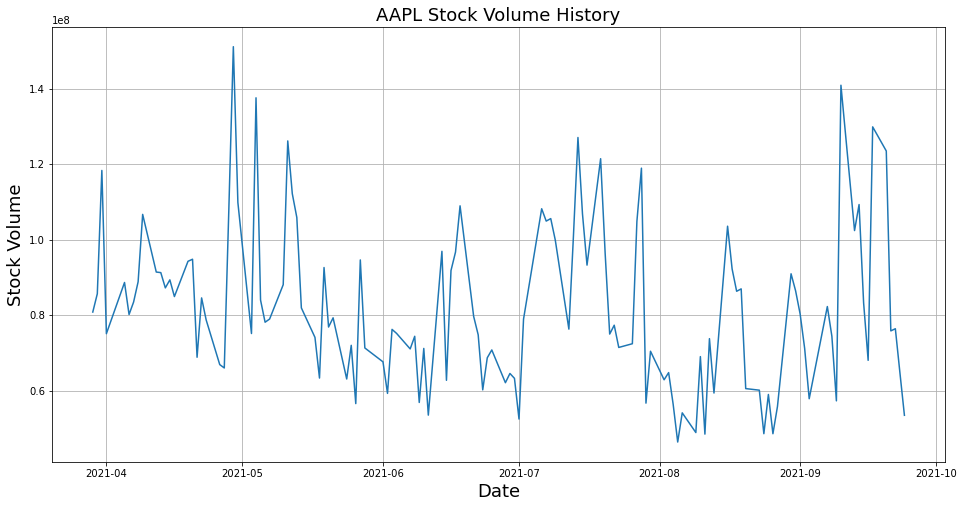

In [12]:
# visualize the volume of stock
plt.figure(figsize=(16,8))
plt.title("AAPL Stock Volume History", fontsize=18)
plt.plot(df_AAPL['Volume'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Stock Volume", fontsize=18)
plt.grid(True)
plt.show()

In [13]:
# creating a new dataframe by selecting only Close/Last column and Date as index
df_AAPL_new = df_AAPL.filter(['Date', 'Close/Last'], axis =1)
df_AAPL_new.head()

,Close/Last
Date,
2021-09-24,$146.92
2021-09-23,$146.83
2021-09-22,$145.85
2021-09-21,$143.43
2021-09-20,$142.94


In [14]:
# We need to convert the datatype of Close/Last column, from object to float
df_AAPL_new['Close/Last'] = df_AAPL_new['Close/Last'].str.replace('$', '')
df_AAPL_new.head()

,Close/Last
Date,
2021-09-24,146.92
2021-09-23,146.83
2021-09-22,145.85
2021-09-21,143.43
2021-09-20,142.94


In [15]:
df_AAPL_new['Close/Last'] = df_AAPL_new['Close/Last'].astype(float)

In [16]:
# # changing the column name from 'Close/Last' to Stock_Closing_Price
# df_AAPL_new.columns = ['Stock_Closing_Price ']
# df_AAPL_new.head()

In [17]:
# verifying whether the datatype of 'Close/Last' column has changed to float or not
df_AAPL_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2021-09-24 to 2021-03-29
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  126 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [18]:
# checking for missing values in the dataframe

In [19]:
df_AAPL_new.isnull()

,Close/Last
Date,
2021-09-24,False
2021-09-23,False
2021-09-22,False
2021-09-21,False
2021-09-20,False
...,...
2021-04-05,False
2021-04-01,False
2021-03-31,False


In [20]:
# checking if there is any missing value or not in the dataset
df_AAPL_new.isnull().sum()

Close/Last    0
dtype: int64

In [21]:
df_AAPL_new.head()

,Close/Last
Date,
2021-09-24,146.92
2021-09-23,146.83
2021-09-22,145.85
2021-09-21,143.43
2021-09-20,142.94


In [22]:
df_AAPL_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2021-09-24 to 2021-03-29
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  126 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


<AxesSubplot:xlabel='Date'>

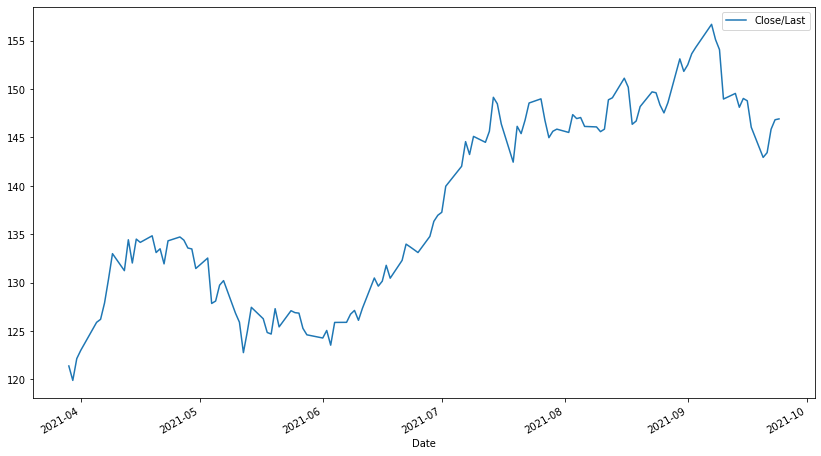

In [23]:
# data visualization using matplotlib
df_AAPL_new.plot()

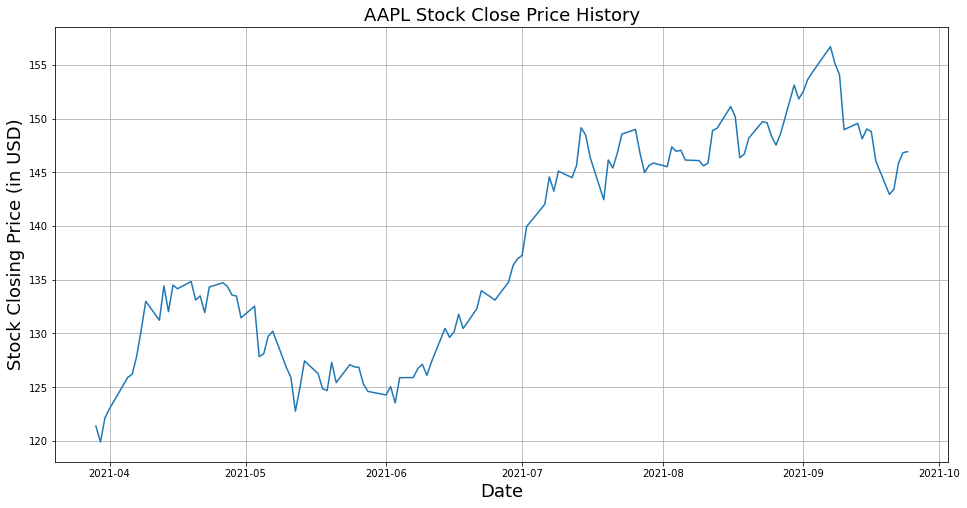

In [24]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("AAPL Stock Close Price History", fontsize=18)
plt.plot(df_AAPL_new['Close/Last'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Stock Closing Price (in USD)", fontsize=18)
plt.grid(True)
plt.show()

In [25]:
#check datatype of index
# df_AAPL.index
df_AAPL_new.index

DatetimeIndex(['2021-09-24', '2021-09-23', '2021-09-22', '2021-09-21',
               '2021-09-20', '2021-09-17', '2021-09-16', '2021-09-15',
               '2021-09-14', '2021-09-13',
               ...
               '2021-04-12', '2021-04-09', '2021-04-08', '2021-04-07',
               '2021-04-06', '2021-04-05', '2021-04-01', '2021-03-31',
               '2021-03-30', '2021-03-29'],
              dtype='datetime64[ns]', name='Date', length=126, freq=None)

In [26]:
# convert to numpy array
data = df_AAPL_new.values
data

array([[146.92 ],
       [146.83 ],
       [145.85 ],
       [143.43 ],
       [142.94 ],
       [146.06 ],
       [148.79 ],
       [149.03 ],
       [148.12 ],
       [149.55 ],
       [148.97 ],
       [154.07 ],
       [155.11 ],
       [156.69 ],
       [154.3  ],
       [153.65 ],
       [152.51 ],
       [151.83 ],
       [153.12 ],
       [148.6  ],
       [147.54 ],
       [148.36 ],
       [149.62 ],
       [149.71 ],
       [148.19 ],
       [146.7  ],
       [146.36 ],
       [150.19 ],
       [151.12 ],
       [149.1  ],
       [148.89 ],
       [145.86 ],
       [145.6  ],
       [146.09 ],
       [146.14 ],
       [147.06 ],
       [146.95 ],
       [147.36 ],
       [145.52 ],
       [145.86 ],
       [145.64 ],
       [144.98 ],
       [146.77 ],
       [148.99 ],
       [148.56 ],
       [146.8  ],
       [145.4  ],
       [146.15 ],
       [142.45 ],
       [146.39 ],
       [148.48 ],
       [149.15 ],
       [145.64 ],
       [144.5  ],
       [145.11 ],
       [14

## Train-Test Split

In [27]:
len(df_AAPL_new)

126

In [28]:
import math
math.ceil(len(df_AAPL_new) * 0.2)

26

In [29]:
train_size = len(df_AAPL_new) - math.ceil(len(df_AAPL_new) * 0.2)

In [30]:
train_size

100

In [31]:
test_size = len(df_AAPL_new) - train_size

In [32]:
test_size

26

In [33]:
test_ind = len(df_AAPL_new)- test_size

In [34]:
train = df_AAPL_new.iloc[:test_ind]
test = df_AAPL_new.iloc[test_ind:]

In [35]:
train

,Close/Last
Date,
2021-09-24,146.92
2021-09-23,146.83
2021-09-22,145.85
2021-09-21,143.43
2021-09-20,142.94
...,...
2021-05-11,125.91
2021-05-10,126.85
2021-05-07,130.21


In [36]:
test

,Close/Last
Date,
2021-05-04,127.850
2021-05-03,132.540
2021-04-30,131.460
2021-04-29,133.480
2021-04-28,133.580
2021-04-27,134.390
2021-04-26,134.720
2021-04-23,134.320
2021-04-22,131.940


In [37]:
train_size, test_size

(100, 26)

## Feature Scaling

In [38]:
import sklearn
sklearn.__version__

'0.24.2'

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = MinMaxScaler()

In [41]:
# Scale the Data
scaler.fit(train)

MinMaxScaler()

In [42]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [43]:
scaled_train

array([[0.71196934],
       [0.70931604],
       [0.68042453],
       [0.60908019],
       [0.59463443],
       [0.68661557],
       [0.76709906],
       [0.77417453],
       [0.7473467 ],
       [0.78950472],
       [0.77240566],
       [0.92275943],
       [0.95341981],
       [1.        ],
       [0.92954009],
       [0.91037736],
       [0.87676887],
       [0.8567217 ],
       [0.89475236],
       [0.76149764],
       [0.73024764],
       [0.75442217],
       [0.7915684 ],
       [0.7942217 ],
       [0.74941038],
       [0.70548349],
       [0.69545991],
       [0.80837264],
       [0.83579009],
       [0.77623821],
       [0.77004717],
       [0.68071934],
       [0.67305425],
       [0.6875    ],
       [0.68897406],
       [0.7160967 ],
       [0.71285377],
       [0.72494104],
       [0.67069575],
       [0.68071934],
       [0.67423349],
       [0.65477594],
       [0.70754717],
       [0.77299528],
       [0.7603184 ],
       [0.7084316 ],
       [0.66715802],
       [0.689

In [44]:
scaled_test

array([[ 0.14976415],
       [ 0.28803066],
       [ 0.25619104],
       [ 0.31574292],
       [ 0.31869104],
       [ 0.34257075],
       [ 0.35229953],
       [ 0.34050708],
       [ 0.27034198],
       [ 0.31633255],
       [ 0.30483491],
       [ 0.35583726],
       [ 0.33579009],
       [ 0.34581368],
       [ 0.27299528],
       [ 0.34375   ],
       [ 0.24970519],
       [ 0.30144458],
       [ 0.22376179],
       [ 0.15123821],
       [ 0.10141509],
       [ 0.09227594],
       [ 0.00678066],
       [-0.0182783 ],
       [-0.08461085],
       [-0.04068396]])